# SAR IMAGE CLASSIFICATION
- Classification problem
- Oceanography/Meteorology
- Pierre Tandeo (pierre.tandeo@imt-atlantique.fr), Ronan Fablet (ronan.fablet@imt-atlantique.fr)

## Data and aim

In this project, we use SAR (Synthetic Aperture Radar) images (20km x 20km) of the ocean surface. The goal is to automatically classify different oceanic and atmospheric phenomena. Below, we will find an example of 10 classes corresponding to 10 different phenomena (among pure ocean swell in F, convective cells in I, icebergs in L, etc...):

![SAR](https://tandeo.files.wordpress.com/2019/01/sar_classes.png)

Here, we will use a database of 160 SAR images per class, anotated by experts. Data were collected in 2016 by the Sentinel-1 satellite.

## Evaluation and benchmark

We divided the database in two parts: "training" and "validation" folders with respectively 70% and 30% of the dataset. To learn the model (here a classifier), we propose to use cross-validations on the training dataset. Then, you will use the validation dataset to evaluate the performance of your model, using the total pourcentage of well predicted data. The reference result is **94% of accuracy** and is given by a deep leaning architecture. The reference paper is given below.

## Reference
- https://tandeo.files.wordpress.com/2019/11/wang_2019.pdf

### Importation libraries

In [0]:
# mount gdrive
from google.colab import drive
drive.mount('/content/drive')


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
# import classical libraries
%matplotlib inline
%pylab inline

# figure size
plt.rcParams['figure.figsize'] = (16, 9)

Populating the interactive namespace from numpy and matplotlib


### Prepare the datasets

Now, we load the training (70%) and validation (30%) datasets.

In [0]:
# import functions
from os import listdir
from os.path import isfile, join
from imageio import imread
import numpy as np

# paths to the training and validation datasets
path_train = "/content/drive/My Drive/Colab Notebooks/Dataset/SAR/training/"
path_validation = "/content/drive/My Drive/Colab Notebooks/Dataset/SAR/validation/"

# class names
classes = ['F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O']
classes_num = np.arange(10)

# initialization
X_train = []
y_train = []
X_validation = []
y_validation = []

# loop on images
for j in range(len(classes)):
    path = path_train + classes[j]
    files = [f for f in listdir(path) if isfile(join(path, f))]
    
    # training
    for i in range(len(files)):
        tmp = imread(path + '/' + files[i])
        X_train.append(ravel(tmp[0:450,0:450:,0]))
        y_train.append(classes_num[j])
    
    # validation
    path = path_validation + classes[j]
    files = [f for f in listdir(path) if isfile(join(path, f))]
    for i in range(len(files)):
        tmp = imread(path + '/' + files[i])
        X_validation.append(ravel(tmp[0:450,0:450:,0]))
        y_validation.append(classes_num[j])
        
# transform to array
X_train = asarray(X_train)
y_train = asarray(y_train)
X_validation = asarray(X_validation)
y_validation = asarray(y_validation)

# CNN

4D tensors

For further processing using keras functions, data must stacked in a 4D tensor with shape (samples, rows, cols, channels). In our case, channels=1 since we are working with greyscale images. Pixel intensities need to rescaled between 0 and 1. Moreover, labels can be described as one-hot vectors using the to_categorical() keras function.

In [0]:
import keras
img_rows, img_cols = 450, 450
num_classes = 10
z_train = []
z_validation = []

# build 4D tensors
X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
X_validation = X_validation.reshape(X_validation.shape[0], img_rows, img_cols, 1)
# data normalization
X_train = X_train.astype('float32')/255.
X_validation = X_validation.astype('float32')/255.
#X_train = log10(X_train.astype('float32')+1)/log10(256)
#X_validation = log10(X_validation.astype('float32')+1)/log10(256)
# convert class vectors to binary class matrices
z_train = keras.utils.to_categorical(y_train, num_classes)
z_validation = keras.utils.to_categorical(y_validation, num_classes)

Using TensorFlow backend.


In [0]:
print(X_train.min())
print(X_train.max())
print(log10(255))
import numpy as np
np.mean(X_train)
np.shape(input_data)

0.0
1.0
2.406540180433955


TensorShape([Dimension(None), Dimension(450), Dimension(450), Dimension(1)])

In [0]:
# add info on roughness
X_train^2
np.diff()

The sequential Keras model is a linear stack of layers. You can create a sequential model by passing a list of layer instances to the constructor. Among the layer instances, you can use:
convolutional layer using Conv2D (https://keras.io/layers/convolutional/#conv2d)
max-pooling layer using MaxPooling2D (https://keras.io/layers/pooling/#maxpooling2d)
Dropout (https://keras.io/layers/core/#dropout)
regular densely-connected layer using Dense (https://keras.io/layers/core/#dense)

In [0]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

In [0]:
input_shape = (img_rows, img_cols, 1)

In [0]:
# model 1 x

input_data = keras.layers.Input(shape=input_shape)
layer1 = keras.layers.MaxPooling2D(pool_size=(3,3))
layer11 = keras.layers.Conv2D(32, kernel_size=(3,3),activation='relu')
layer21 = keras.layers.Conv2D(64, kernel_size=(3,3),activation='relu')
layer31 = keras.layers.Conv2D(128, kernel_size=(3,3),activation='relu')
layerF = keras.layers.Flatten()
layer97 = keras.layers.MaxPooling2D(pool_size=(5,5))
layer98 = keras.layers.Dense(128, activation='relu')
layer99 = keras.layers.Dense(num_classes, activation='softmax')

x1 = layer11(input_data)
x1 = layer97(layer31(layer1(layer21(layer1(x1)))))
x1 = layer99(layer98(layerF(x1)))
model1    = keras.models.Model(input_data,x1)

# model 2 x, x2
layer1 = keras.layers.MaxPooling2D(pool_size=(3,3))
layer11 = keras.layers.Conv2D(32, kernel_size=(3,3),activation='relu')
layer12 = keras.layers.Conv2D(16, kernel_size=(3,3),activation='relu')
layer13 = keras.layers.Conv2D(16, kernel_size=(3,3),activation='relu')
layer21 = keras.layers.Conv2D(64, kernel_size=(3,3),activation='relu')
layer31 = keras.layers.Conv2D(128, kernel_size=(3,3),activation='relu')
layerF = keras.layers.Flatten()
layer97 = keras.layers.MaxPooling2D(pool_size=(5,5))
layer98 = keras.layers.Dense(128, activation='relu')
layer99 = keras.layers.Dense(num_classes, activation='softmax')

x2 = keras.layers.Concatenate(axis=3)([layer11(input_data), keras.layers.multiply([layer12(input_data), layer13(input_data)])])
x2 = layer97(layer31(layer1(layer21(layer1(x2)))))
x2 = layer99(layer98(layerF(x2)))
model2  = keras.models.Model(input_data,x2)


# model 3 x, x2, 
layer1 = keras.layers.MaxPooling2D(pool_size=(3,3))
layer11 = keras.layers.Conv2D(32, kernel_size=(7,7),activation='relu')
layer12 = keras.layers.Conv2D(16, kernel_size=(7,7),activation='relu')
layer13 = keras.layers.Conv2D(16, kernel_size=(7,7),activation='relu')
layer21 = keras.layers.Conv2D(64, kernel_size=(3,3),activation='relu')
layer31 = keras.layers.Conv2D(128, kernel_size=(3,3),activation='relu')
layerF = keras.layers.Flatten()
layerF2 = keras.layers.Flatten()
layer97 = keras.layers.MaxPooling2D(pool_size=(5,5))
layer96 = keras.layers.MaxPooling2D(pool_size=(25,25))
layer98 = keras.layers.Dense(128, activation='relu')
layer99 = keras.layers.Dense(num_classes, activation='softmax')

x31 = keras.layers.Concatenate(axis=3)([layer11(input_data), keras.layers.multiply([layer12(input_data), layer13(input_data)])])
x3 = layer97(layer31(layer1(layer21(layer1(x31)))))
x31 = layer96(x31)
x3 = keras.layers.Concatenate(axis=-1)([layerF(x3), layerF2(x31)])
x3 = layer99(layer98(x3))
model3  = keras.models.Model(input_data,x3)

#layer99 = keras.layers.Dense(num_classes, activation='softmax')
#x13 = keras.layers.Concatenate(axis=-1)([x1, x3])
#x13 = layer99(x13)
#model13 = keras.models.Model(input_data,x13)



1) Create a convolutional neural network following the architecture given below:
convolutional layer using 32 3x3 filters with stride 1 and "ReLU" activation
convolutional layer using 64 3x3 filters with stride 1 and "ReLU" activation
max pooling with vertical, horizontal downscale of 2
flatten layer (https://keras.io/layers/core/#flatten) to flatten the input array
dense layer with 128 units
dense layer with "num_classes=10" units

In [0]:
# model = Sequential()
# model.add(MaxPooling2D(pool_size=(2, 2),
#                  input_shape=input_shape))
# model.add(Conv2D(32, kernel_size=(3, 3),
#                  activation='relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.2))
# model.add(Conv2D(32, (3, 3), activation='relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.2))
# model.add(Conv2D(64, (3, 3), activation='relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.2))
# model.add(Conv2D(128, (3, 3), activation='relu'))
# model.add(MaxPooling2D(pool_size=(4, 4)))
# model.add(Flatten())
# model.add(Dense(128, activation='relu'))
# model.add(Dense(num_classes, activation='softmax'))

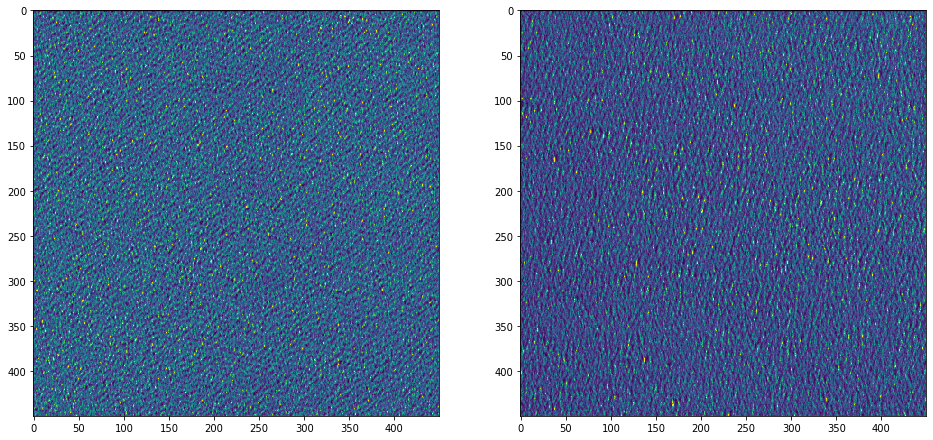

In [0]:
import matplotlib.pyplot as plt
plt.figure()
plt.subplot(1,2,1)
plt.imshow(squeeze(X_train[0,:,:]))

plt.subplot(1,2,2)
plt.imshow(squeeze(X_validation[0,:,:]))


Before training a model, you need to configure the learning process, which is done through the compile() method. It receives three arguments:
an optimizer: this could be the string identifier of an existing optimizer (such as rmsprop or adagrad), or an instance of the Optimizer class.
A loss function: this is the objective that the model will try to minimize. It can be the string identifier of an existing loss function (such as categorical_crossentropy or mse), or an objective function.
A list of metrics to evaluate results. A metric could be the string identifier of an existing metric or a custom metric function.

In [0]:
#model.compile(loss=keras.losses.categorical_crossentropy,
#              optimizer=keras.optimizers.Adadelta(),
#              metrics=['accuracy'])
model1.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])
model2.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])
model3.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(1e-3),
              metrics=['accuracy'])
#model13.compile(loss=keras.losses.categorical_crossentropy,
#              optimizer=keras.optimizers.Adam(),
#              metrics=['accuracy'])


In [0]:
model1.summary()

In [0]:
model3.summary()

In [47]:
model13.summary()

Model: "model_16"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            (None, 450, 450, 1)  0                                            
__________________________________________________________________________________________________
conv2d_62 (Conv2D)              (None, 444, 444, 16) 800         input_5[0][0]                    
__________________________________________________________________________________________________
conv2d_63 (Conv2D)              (None, 444, 444, 16) 800         input_5[0][0]                    
__________________________________________________________________________________________________
conv2d_61 (Conv2D)              (None, 444, 444, 32) 1600        input_5[0][0]                    
___________________________________________________________________________________________

#### 4) Keras models are trained on Numpy arrays of input data and labels. For training a model, we can use the fit() function (https://keras.io/models/sequential/#fit). Run the training using a batch size of 128 and 12 epochs. Test data will be used as validatation data.

In [74]:
batch_size = 128
epochs = 30
hist1 = model1.fit(X_train, z_train,
                 batch_size=batch_size,
                 epochs=epochs,
                 verbose=1,
                 validation_data=(X_validation, z_validation))

Train on 1120 samples, validate on 480 samples
Epoch 1/30
1120/1120 [==============================] - 5s 4ms/step - loss: 0.2083 - acc: 0.9420 - val_loss: 1.3286 - val_acc: 0.6979
Epoch 2/30
1120/1120 [==============================] - 5s 4ms/step - loss: 0.1624 - acc: 0.9437 - val_loss: 1.1346 - val_acc: 0.7125
Epoch 3/30
1120/1120 [==============================] - 5s 4ms/step - loss: 0.0584 - acc: 0.9884 - val_loss: 1.1788 - val_acc: 0.7167
Epoch 4/30
1120/1120 [==============================] - 5s 4ms/step - loss: 0.0394 - acc: 0.9964 - val_loss: 1.2055 - val_acc: 0.7271
Epoch 5/30
1120/1120 [==============================] - 5s 4ms/step - loss: 0.0476 - acc: 0.9884 - val_loss: 1.1895 - val_acc: 0.7333
Epoch 6/30
1120/1120 [==============================] - 5s 4ms/step - loss: 0.0726 - acc: 0.9786 - val_loss: 1.2021 - val_acc: 0.7146
Epoch 7/30
1120/1120 [==============================] - 5s 4ms/step - loss: 0.0367 - acc: 0.9964 - val_loss: 1.2244 - val_acc: 0.7333
Epoch 8/30
1120

In [72]:
batch_size = 64
epochs = 1
hist2 = model2.fit(X_train, z_train,
                 batch_size=batch_size,
                 epochs=epochs,
                 verbose=1,
                 validation_data=(X_validation, z_validation))

Train on 1120 samples, validate on 480 samples
Epoch 1/1
1120/1120 [==============================] - 10s 9ms/step - loss: 0.1170 - acc: 0.9661 - val_loss: 1.0268 - val_acc: 0.7250


In [54]:
batch_size = 32
epochs = 30
hist3 = model3.fit(X_train, z_train,
                 batch_size=batch_size,
                 epochs=epochs,
                 verbose=1,
                 validation_data=(X_validation, z_validation))

Train on 1120 samples, validate on 480 samples
Epoch 1/30
1120/1120 [==============================] - 13s 12ms/step - loss: 2.2849 - acc: 0.1786 - val_loss: 1.9406 - val_acc: 0.2229
Epoch 2/30
1120/1120 [==============================] - 12s 10ms/step - loss: 1.8309 - acc: 0.3187 - val_loss: 1.6075 - val_acc: 0.4333
Epoch 3/30
1120/1120 [==============================] - 12s 10ms/step - loss: 1.5237 - acc: 0.4420 - val_loss: 1.3465 - val_acc: 0.5188
Epoch 4/30
1120/1120 [==============================] - 12s 11ms/step - loss: 1.4008 - acc: 0.4991 - val_loss: 1.2680 - val_acc: 0.5437
Epoch 5/30
1120/1120 [==============================] - 12s 11ms/step - loss: 1.2733 - acc: 0.5018 - val_loss: 1.2547 - val_acc: 0.5437
Epoch 6/30
1120/1120 [==============================] - 12s 11ms/step - loss: 1.1829 - acc: 0.5509 - val_loss: 1.3070 - val_acc: 0.5146
Epoch 7/30
1120/1120 [==============================] - 12s 11ms/step - loss: 1.0593 - acc: 0.6214 - val_loss: 1.1329 - val_acc: 0.5521
E

In [48]:
batch_size = 32
epochs = 30
hist13 = model13.fit(X_train, z_train,
                 batch_size=batch_size,
                 epochs=epochs,
                 verbose=1,
                 validation_data=(X_validation, z_validation))

Train on 1120 samples, validate on 480 samples
Epoch 1/30
1120/1120 [==============================] - 18s 16ms/step - loss: 2.2805 - acc: 0.1286 - val_loss: 2.2459 - val_acc: 0.1625
Epoch 2/30
1120/1120 [==============================] - 16s 14ms/step - loss: 2.2576 - acc: 0.1652 - val_loss: 2.2302 - val_acc: 0.1667
Epoch 3/30
1120/1120 [==============================] - 16s 14ms/step - loss: 2.2333 - acc: 0.1500 - val_loss: 2.2158 - val_acc: 0.1729
Epoch 4/30
1120/1120 [==============================] - 16s 14ms/step - loss: 2.2191 - acc: 0.1607 - val_loss: 2.1894 - val_acc: 0.1562
Epoch 5/30
1120/1120 [==============================] - 16s 14ms/step - loss: 2.2082 - acc: 0.1750 - val_loss: 2.1749 - val_acc: 0.1271
Epoch 6/30
1120/1120 [==============================] - 16s 14ms/step - loss: 2.1775 - acc: 0.1955 - val_loss: 2.1847 - val_acc: 0.1979
Epoch 7/30
1120/1120 [==============================] - 16s 14ms/step - loss: 2.1688 - acc: 0.2000 - val_loss: 2.1442 - val_acc: 0.2000
E

KeyboardInterrupt: ignored

------------------------------
Displaying losses...


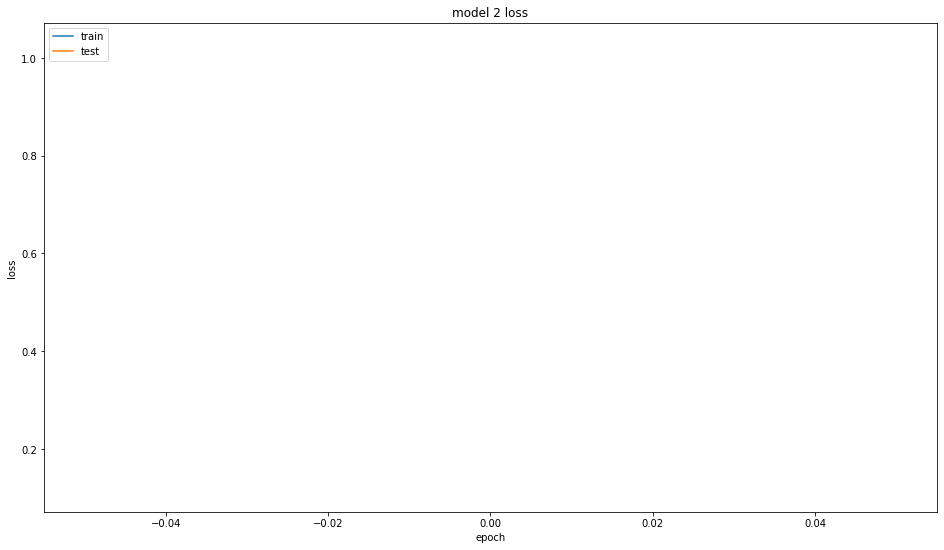

In [77]:
print('-'*30+'\n'+'Displaying losses...')
plt.plot(hist2.history['loss'])
plt.plot(hist2.history['val_loss'])
plt.title('model 2 loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

------------------------------
Displaying accuracy...


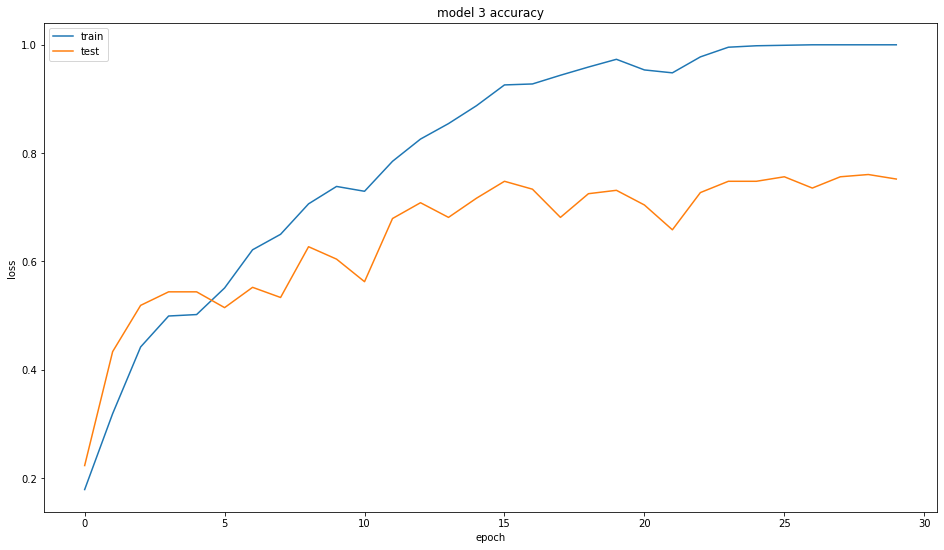

In [58]:
print('-'*30+'\n'+'Displaying accuracy...')
plt.plot(hist3.history['acc'])
plt.plot(hist3.history['val_acc'])
plt.title('model 3 accuracy')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

------------------------------
Displaying nb of occurence per class...


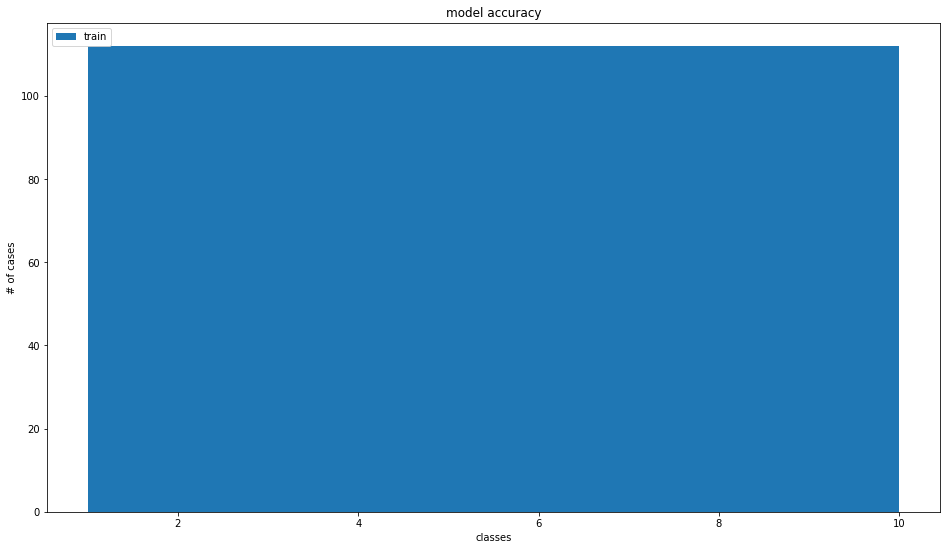

In [38]:
print('-'*30+'\n'+'Displaying nb of occurence per class...')
plt.hist(y_train,classes_num+1)
plt.title('model accuracy')
plt.ylabel('# of cases')
plt.xlabel('classes')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [25]:
print(np.ndarray.flatten(y_train))
print(np.shape(y_train))

[0 0 0 ... 9 9 9]
(1120,)


Normalized confusion matrix


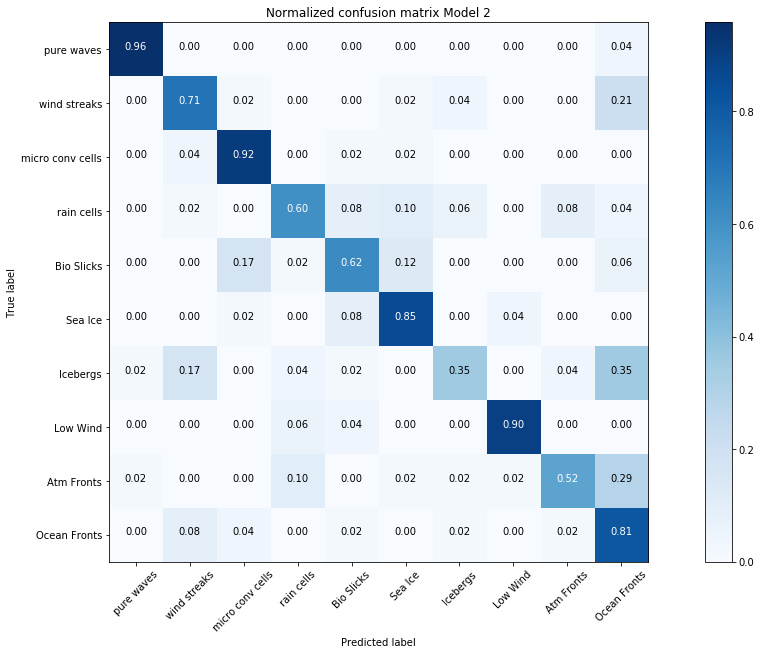

In [73]:
from sklearn.metrics import confusion_matrix
import itertools

z_pred = model2.predict(X_validation)
y_pred = np.argmax(z_pred,axis=1)

class_names= ['pure waves','wind streaks','micro conv cells','rain cells','Bio Slicks','Sea Ice','Icebergs','Low Wind','Atm Fronts','Ocean Fronts']

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    #print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_validation, y_pred)
np.set_printoptions(precision=2)

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix Model 2')

plt.show()

### Apply naive classifier

In [0]:
# import functions
from sklearn.neighbors.nearest_centroid import NearestCentroid
from sklearn.metrics import accuracy_score

# apply k-nearest classification
clf = NearestCentroid()
clf.fit(X_train, y_train)
y_predict = clf.predict(X_validation)

# compute average classifier score
print('Accuracy: '+ str(accuracy_score(y_validation, y_predict)))

# we are far from the 94% accuracy given a deep learning model!

Accuracy: 0.2625
